<a href="https://colab.research.google.com/github/vikash09082003/EMPLOYEE-MANAGEMENT-SYSTEM/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving gld_price_data.csv to gld_price_data.csv


{'gld_price_data.csv': b'Date,SPX,GLD,USO,SLV,EUR/USD\r\n1/2/2008,1447.160034,84.860001,78.470001,15.18,1.471692\r\n1/3/2008,1447.160034,85.57,78.370003,15.285,1.474491\r\n1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492\r\n1/7/2008,1416.180054,84.769997,75.5,15.053,1.468299\r\n1/8/2008,1390.189941,86.779999,76.059998,15.59,1.557099\r\n1/9/2008,1409.130005,86.550003,75.25,15.52,1.466405\r\n1/10/2008,1420.329956,88.25,74.019997,16.061001,1.4801\r\n1/11/2008,1401.02002,88.580002,73.089996,16.077,1.479006\r\n1/14/2008,1416.25,89.540001,74.25,16.280001,1.4869\r\n1/15/2008,1380.949951,87.989998,72.779999,15.834,1.48021\r\n1/16/2008,1373.199951,86.699997,71.849998,15.654,1.466405\r\n1/17/2008,1333.25,86.5,71.029999,15.717,1.464\r\n1/18/2008,1325.189941,87.419998,71.540001,16.030001,1.461796\r\n1/22/2008,1310.5,88.169998,70.550003,15.902,1.464794\r\n1/23/2008,1338.599976,87.889999,69.5,15.9,1.463208\r\n1/24/2008,1352.069946,90.080002,70.93,16.299999,1.47741\r\n1/25/2008,1330.609985,90

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
# Calculate correlation excluding the 'Date' column
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

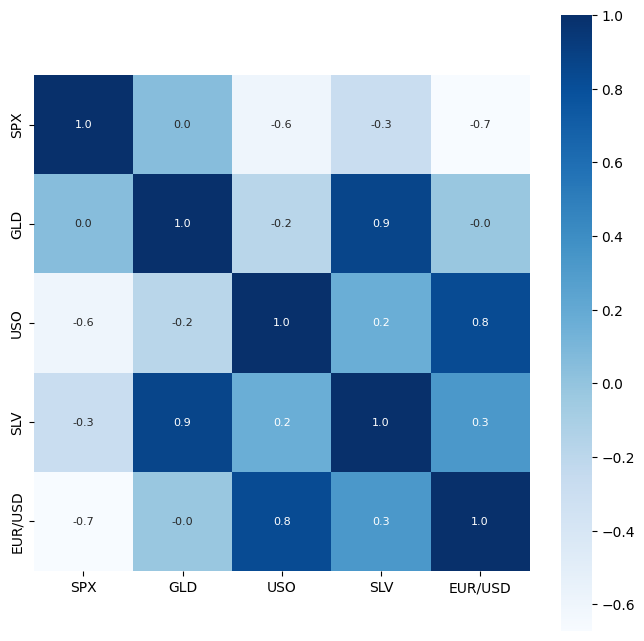

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

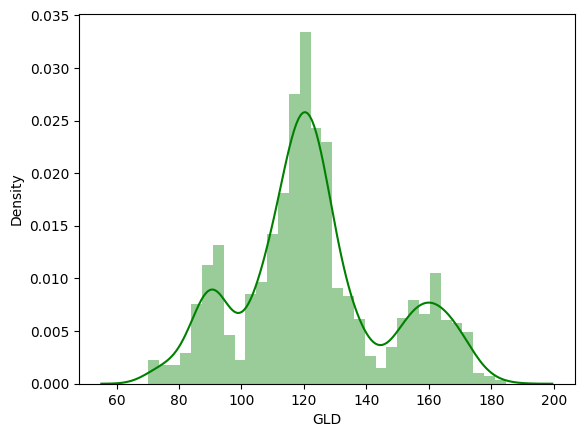

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.35609942  81.6922999  116.22190014 127.61540072 120.63170148
 154.65389768 150.23379963 126.1672     117.33699871 125.98230081
 116.9363009  172.19300092 141.21699834 167.54639832 115.18200015
 117.73870041 138.89870254 170.0981005  159.9781028  157.40129945
 155.14760001 125.35379994 176.51429893 157.48480317 125.16000029
  93.88379959  77.34000023 120.74040015 119.00789888 167.59040008
  88.21250091 125.17560036  91.05660074 117.72810033 121.10619924
 135.81480106 115.53130121 114.96150088 147.86440003 107.48550066
 104.41580233  87.03659778 126.5779006  117.84430015 153.50879872
 119.84009977 108.49369974 108.37269824  93.14460008 127.25739732
  74.97150035 113.71779915 121.68560009 111.37159906 118.79839893
 120.84129887 158.90899941 168.32040069 146.99769683  85.79839847
  94.13300046  86.80469878  90.4958     118.98440111 126.52310067
 127.67910004 170.00450023 122.21319936 117.41699885  98.57900054
 168.28780198 143.03729862 131.70840311 121.28640251 120.51649957
 119.61360

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9886694555143358


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

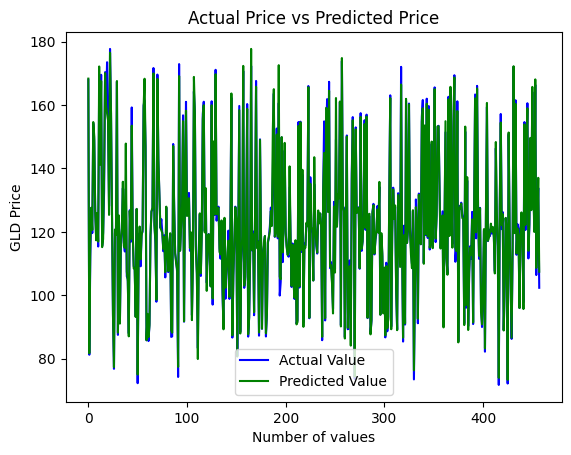

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()